# L05-2-Grouping
## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here.


# Grouping Data
Grouping and summarizing data is quite common. In this exercise, you explore the dplyr package from the tidyverse which makes grouping simple using group_by() and summarize(). You also use of the many convenience functions that combine various grouping, summarizing, and arranging steps together, reducing the amount of code and increasing readability. 

After you group and aggregate the mpg data by hand, you compare it to ggplot which also has some built-in statistics functions. If you are grouping to create summary statistics, you may be able to let ggplot do them for you.

## R Features
* library()
* group_by()
* summarize()
* n()
* arrange()
* desc()
* tally()
* count()
* max()
* mean()
* min()
* gather()
* str_replace()
* geom_col()
* mutate()
* aes()
* as.factor()
* fct_relevel()
* c()
* facet_wrap()
* geom_boxplot()


## Datasets
* mpg


In [1]:
# Load libraries
library(forcats)    # forcats
library(stringr)    # stringr
library(tidyverse)  # tidyverse


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ readr   1.1.1
✔ tibble  2.1.3     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ dplyr   0.8.3
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## dplyr package
* add_rownames            Convert row names to an explicit variable.
* all_equal               Flexible equality comparison for data frames.
* arrange                 Arrange rows by variables.
* as.table.tbl_cube       Coerce a 'tbl_cube' to other data structures
* as.tbl_cube             Coerce an existing data structure into a 'tbl_cube'
* auto_copy               Copy tables to same source, if necessary.
* bench_compare           Evaluate, compare, benchmark operations of a set of srcs.
* between                 Do values in a numeric vector fall in specified range?
* bind                    Efficiently bind multiple data frames by row and column.
* build_sql               Build a SQL string.
* case_when               A general vectorized if.
* coalesce                Find first non-missing element
* compute                 Compute a lazy tbl.
* copy_to                 Copy a local data frame to a remote src.
* copy_to.src_sql         Copy a local data frame to a sqlite src.
* cumall                  Cumulativate versions of any, all, and mean
* desc                    Descending order.
* distinct                Select distinct/unique rows.
* do                      Do arbitrary operations on a tbl.
* dplyr                   dplyr: a grammar of data manipulation
* explain                 Explain details of a tbl.
* failwith                Fail with specified value.
* filter                  Return rows with matching conditions.
* funs                    Create a list of functions calls.
* group_by                Group a tbl by one or more variables.
* group_indices           Group id.
* group_size              Calculate group sizes.
* groups                  Get/set the grouping variables for tbl.
* if_else                 Vectorized if.
* join                    Join two tbls together.
* join.tbl_df             Join data frame tbls.
* join.tbl_sql            Join sql tbls.
* lead-lag                Lead and lag.
* location                Print the location in memory of a data frame
* mutate                  Add new variables.
* n                       The number of observations in the current group.
* n_distinct              Efficiently count the number of unique values in a set of vector
* na_if                   Convert values to NA.
* nasa                    NASA spatio-temporal data
* near                    Compare two numeric vectors.
* nth                     Extract the first, last or nth value from a vector.
* order_by                A helper function for ordering window function output.
* ranking                 Windowed rank functions.
* recode                  Recode values
* rowwise                 Group input by rows
* sample                  Sample n rows from a table.
* select                  Select/rename variables by name.
* select_helpers          Select helpers
* select_if               Select columns using a predicate
* setops                  Set operations.
* slice                   Select rows by position.
* src-test                A set of DBI methods to ease unit testing dplyr with DBI
* src_memdb               Per-session in-memory SQLite databases.
* src_mysql               Connect to mysql/mariadb.
* src_postgres            Connect to postgresql.
* src_sqlite              Connect to a sqlite database.
* src_tbls                List all tbls provided by a source.
* summarise               Summarise multiple values to a single value.
* summarise_all           Summarise and mutate multiple columns.
* summarise_each          Summarise and mutate multiple columns.
* tally                   Counts/tally observations by group.
* tbl                     Create a table from a data source
* tbl_cube                A data cube tbl.
* tbl_df                  Create a data frame tbl.
* tbl_vars                List variables provided by a tbl.
* top_n                   Select top (or bottom) n rows (by value).
* translate_sql           Translate an expression to sql.
* vars                    Select columns

In [ ]:
# Use library(help = "package")
# to see the functions
library(help = "dplyr")


In [2]:
# glimpse mpg
mpg %>% glimpse()

# display result, top 6 rows
# Hint: head()
mpg %>% head()


Observations: 234
Variables: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", …
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", …
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2…
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, 20…
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8,…
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "aut…
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "…
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, …
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, …
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "…
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "…


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## distinct()
Select distinct/unique rows. Retain only unique/distinct rows from an input tbl. This is similar to unique.data.frame, but considerably faster. 
### Usage
distinct(.data, ..., .keep_all = FALSE)

In [ ]:
# View help on distinct()
#?distinct()


In [3]:
# Display the distinct rows of mpg$class
mpg %>% distinct(mpg$class)


mpg$class
<chr>
compact
midsize
suv
2seater
minivan
pickup
subcompact


## group_by()
Group a tbl by one or more variables. Most data operations are useful done on groups defined by variables in the dataset. The group_by function takes an existing tbl and converts it into a grouped tbl where operations are performed "by group". 
### Usage
group_by(.data, ..., add = FALSE)

In [ ]:
# View help on group_by()
#?group_by()


## summarize()
Summarize multiple values to a single value.
### Usage
summarise(.data, ...)

In [4]:
# View help on summarize()
#?summarize()


## n()
The number of observations in the current group. This function is implemented special for each data source and can only be used from within summarize, mutate and filter.
### Usage
n()

In [6]:
# View help for n()
?n()

if (require("nycflights13")) {
carriers <- group_by(flights, carrier)
summarise(carriers, n())
mutate(carriers, n = n())
filter(carriers, n() < 100)
}

Loading required package: nycflights13


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,30,1222,1115,67,1402,1215,107,OO,8500,N978SW,LGA,ORD,132,733,11,15,2013-01-30 11:00:00
2013,11,3,1424,1430,-6,1629,1634,-5,OO,4483,N813SK,EWR,MSP,166,1008,14,30,2013-11-03 14:00:00
2013,11,10,1443,1430,13,1701,1634,27,OO,4483,N813SK,EWR,MSP,177,1008,14,30,2013-11-10 14:00:00
2013,11,17,1422,1430,-8,1610,1634,-24,OO,4483,N693CA,EWR,MSP,152,1008,14,30,2013-11-17 14:00:00
2013,11,25,1803,1759,4,2011,2017,-6,OO,4659,N803SK,EWR,MSP,157,1008,17,59,2013-11-25 17:00:00
2013,11,30,1648,1647,1,1814,1811,3,OO,4967,N746SK,LGA,IAD,50,229,16,47,2013-11-30 16:00:00
2013,6,15,1626,1635,-9,1810,1830,-20,OO,4528,N913EV,EWR,DTW,81,488,16,35,2013-06-15 16:00:00
2013,6,22,1846,1635,131,2107,1830,157,OO,4528,N427SW,EWR,DTW,88,488,16,35,2013-06-22 16:00:00
2013,8,27,1755,1805,-10,1956,1953,3,OO,5568,N789SK,LGA,CLE,64,419,18,5,2013-08-27 18:00:00


## arrange()
Arrange rows by variables. Use desc to sort a variable in descending order. Generally, this will not also automatically order by grouping variables.
### Usage
arrange(.data, ...)

In [7]:
# View help on arrange()
#?arrange()


## desc()
Descending order. Transform a vector into a format that will be sorted in descending order. 
### Usage
desc(x)

In [8]:
# View help on desc()
#?desc()


In [10]:
# Display the distinct values of mpg$class and row count
# Sort by largest class first
# Use group_by(), summarize(), n(), arrange()
mpg %>% 
   group_by(class) %>% 
   summarize(n = n()) %>%
   arrange(n %>% desc())


class,n
<chr>,<int>
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


## tally()
Counts/tally observations by group. tally is a convenient wrapper for summarize that will either call n or sum(n) depending on whether you're tallying for the first time, or re-tallying. count() is similar, but also does the group_by for you. 
### Usage
tally(x, wt, sort = FALSE)

In [11]:
# View help on tally()
#tally()


In [12]:
# Display the distinct values of mpg$class and row count
# Use group_by(), tally()
# Sort results, largest first
mpg %>% 
   group_by(mpg$class) %>% 
   tally(sort = TRUE)


mpg$class,n
<chr>,<int>
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


## Count()
Counts/tally observations by group. tally is a convenient wrapper for summarize that will either call n or sum(n) depending on whether you're tallying for the first time, or re-tallying. count() is similar, but also does the group_by for you.
### Usage
count(x, ..., wt = NULL, sort = FALSE)

In [14]:
# View help on count
?count()


In [13]:
# Display the distinct values of mpg$class and row count
# Use count()
# Sort results, largest first
mpg %>% count(mpg$class, sort = TRUE)


mpg$class,n
<chr>,<int>
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


Summarize the mpg data to have min, max and mean highway miles per gallon by class

In [16]:
# Transform mpg into 
# Columns: class, hwy_max, hwy_avg, hwy_min
# where max, avg, and min are summaries of hwy 
# grouped by class
# source: mpg
# result: df
df <- mpg %>% group_by(class) %>% 
   summarize(hwy_max = hwy %>% max(),
            hwy_avg = hwy %>% mean(),
            hwy_min = hwy %>% min())

# glimpse result
df %>% glimpse()

# display result
df

Observations: 7
Variables: 4
$ class   <chr> "2seater", "compact", "midsize", "minivan", "pickup", "subcom…
$ hwy_max <int> 26, 44, 32, 24, 22, 44, 27
$ hwy_avg <dbl> 24.80000, 28.29787, 27.29268, 22.36364, 16.87879, 28.14286, 1…
$ hwy_min <int> 23, 23, 23, 17, 12, 20, 12


class,hwy_max,hwy_avg,hwy_min
<chr>,<int>,<dbl>,<int>
2seater,26,24.80000,23
compact,44,28.29787,23
midsize,32,27.29268,23
minivan,24,22.36364,17
pickup,22,16.87879,12
subcompact,44,28.14286,20
suv,27,18.12903,12


Notice there is one row per unique class. Also notice hwy_min and hwy_max are integers while hwy_avg is a double.

Next: Gather hwy_min, hwy_max, hwy_avg into name / value pair columns.

In [17]:
# Gather hwy_min, hwy_max, hwy_avg into 
# hwy_metric and hwy_value columns
# source: df
# result: df2
# Hint: gather()
df2 <- df %>% 
   gather(2:4, key = hwy_metric , value = hwy_value)

# glimpse result
df2 %>% glimpse()

# display result
df2


Observations: 21
Variables: 3
$ class      <chr> "2seater", "compact", "midsize", "minivan", "pickup", "sub…
$ hwy_metric <chr> "hwy_max", "hwy_max", "hwy_max", "hwy_max", "hwy_max", "hw…
$ hwy_value  <dbl> 26.00000, 44.00000, 32.00000, 24.00000, 22.00000, 44.00000…


class,hwy_metric,hwy_value
<chr>,<chr>,<dbl>
2seater,hwy_max,26.00000
compact,hwy_max,44.00000
midsize,hwy_max,32.00000
minivan,hwy_max,24.00000
pickup,hwy_max,22.00000
subcompact,hwy_max,44.00000
suv,hwy_max,27.00000
2seater,hwy_avg,24.80000
compact,hwy_avg,28.29787


Notice the prior columns are gone and hwy_metric and hwy_value took their place. The number of rows increased as a result of the gather() operation.

Next: Remove the hwy\_ prefix from hwy_metric column

In [18]:
# Remove the hwy_ prefix from hwy_metric column
# Store result in df3
# Hint: str_replace()
df3 <- df2 %>% 
   mutate(hwy_metric = hwy_metric %>% str_replace("hwy_", ""))

# Glimpse result
df3 %>% glimpse()

# Display result
df3


Observations: 21
Variables: 3
$ class      <chr> "2seater", "compact", "midsize", "minivan", "pickup", "sub…
$ hwy_metric <chr> "max", "max", "max", "max", "max", "max", "max", "avg", "a…
$ hwy_value  <dbl> 26.00000, 44.00000, 32.00000, 24.00000, 22.00000, 44.00000…


class,hwy_metric,hwy_value
<chr>,<chr>,<dbl>
2seater,max,26.00000
compact,max,44.00000
midsize,max,32.00000
minivan,max,24.00000
pickup,max,22.00000
subcompact,max,44.00000
suv,max,27.00000
2seater,avg,24.80000
compact,avg,28.29787


Notice the values of hwy_metric do not contain 'hwy\_' anymore.

Next: Plot all metrics

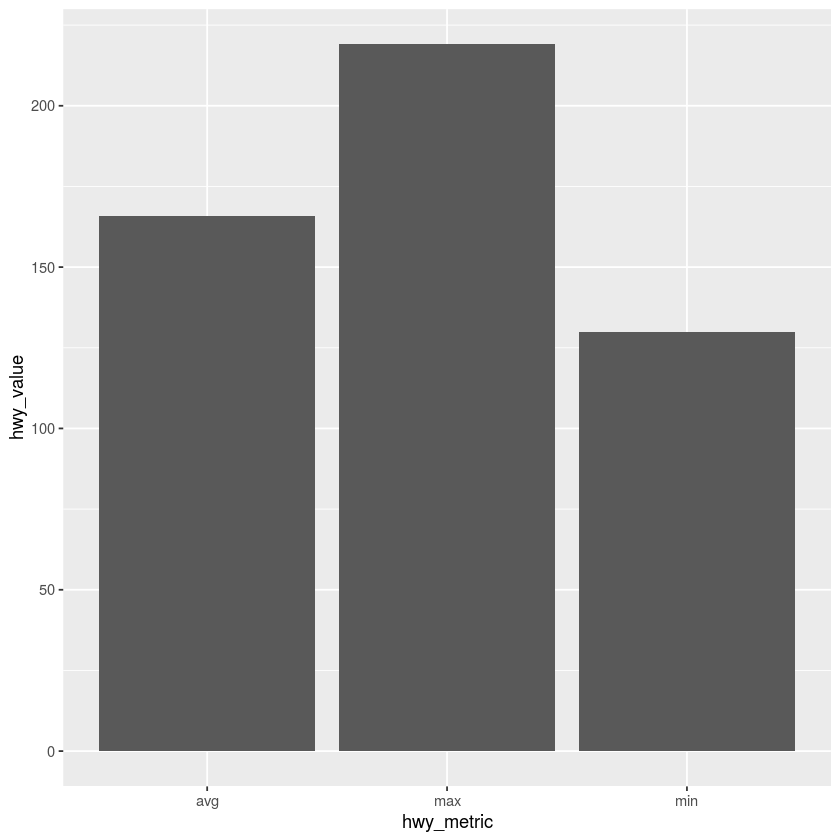

In [19]:
# Plot min, max, and avg
# Hint: geom_col()
df3 %>% 
   ggplot(aes(x = hwy_metric, y = hwy_value)) + 
      geom_col()


Notice the order is avg, max, and then min. It would make more sense to order them min, avg, then max. 

Next: Convert hwy_metric to a factor then order the levels.

In [20]:
# Convert hwy_metric to a factor
# Store result in df4
# Hint: as.factor()
df4 <- df3 %>% 
   mutate(hwy_metric = hwy_metric %>% as.factor())

# Display the levels and row count
# Hint: fct_count()
df4$hwy_metric %>% fct_count()

# Reorder the levels
# min, avg, max
# update df4
# Hint: fct_relevel()
df4 <- df4 %>% 
  mutate(hwy_metric = hwy_metric %>% fct_relevel(c("min", "avg", "max")))

# Display the levels and row count
# Hint: fct_count()
df4$hwy_metric %>% fct_count()


f,n
<fct>,<int>
avg,7
max,7
min,7


f,n
<fct>,<int>
min,7
avg,7
max,7


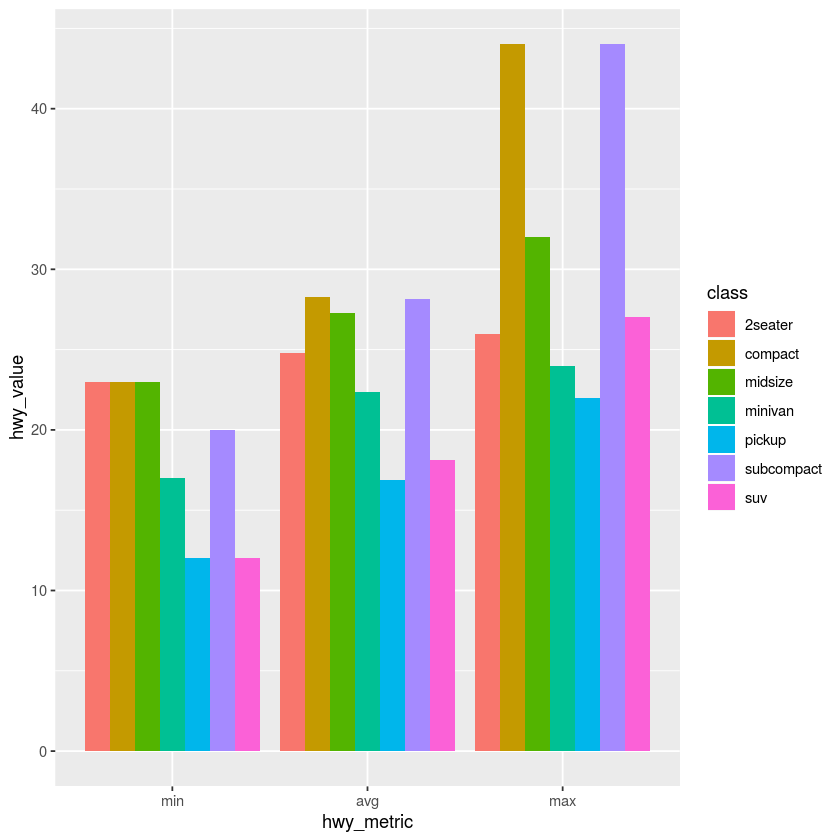

In [21]:
# Plot min, max, and avg
# using geom_col()
# fill by class
# position = "dodge"
df4 %>% 
   ggplot(aes(hwy_metric, hwy_value, fill = class)) + 
      geom_col(position = "dodge")


Notice which class has the lowest average hwy mpg.

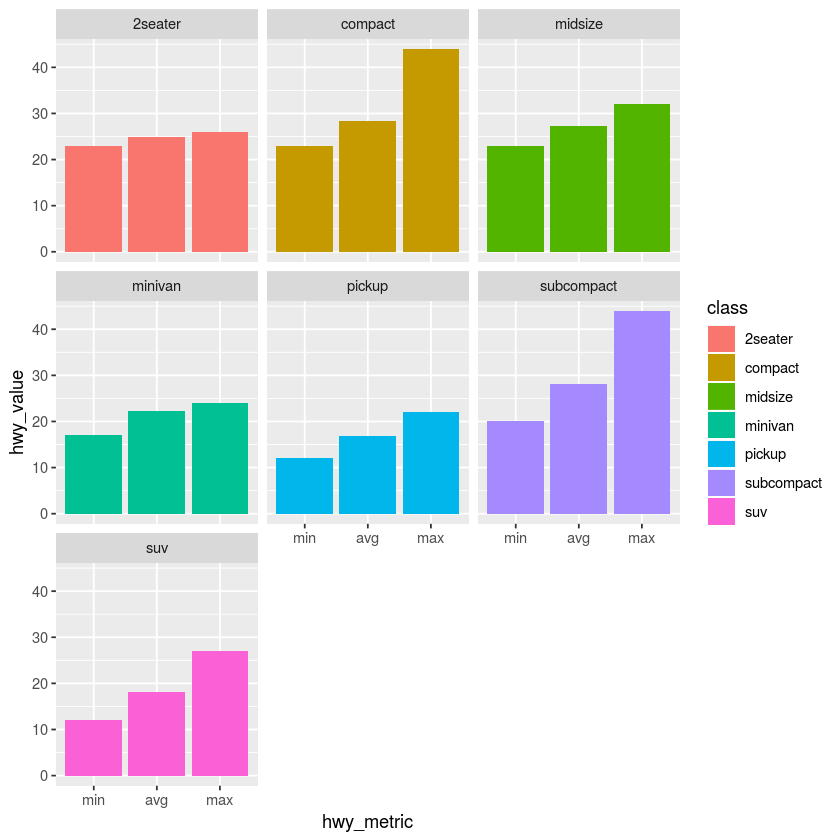

In [22]:
# Plot min, max, and avg
# using geom_col()
# fill by class
# position = "dodge"
# facet by class
df4 %>% 
   ggplot(aes(hwy_metric, hwy_value, fill = class)) + 
      geom_col(position = "dodge") +
      facet_wrap( ~class)


Notice how compact and sub compact have a larger delta from min to max. Also notice the 2seater, by contrast doesn't have much of a delta from min to max.

## Boxplot
Many common summaries such as min, mean, and max are built into ggplot and wouldn't require calculuating them in the data frame. A boxplot is a good visualization of the variance of a value. It is a bit more sophisticated than min, mean, and max, but conveys the information perhaps even better.

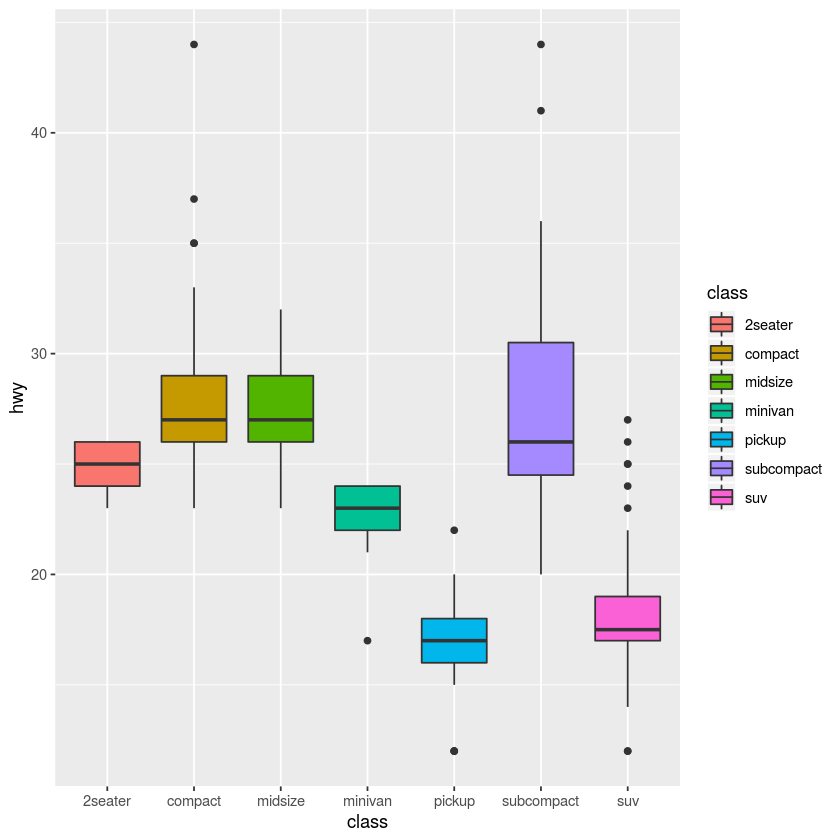

In [23]:
# Create a box plot of
# mpg class and hwy
# fill by class
# Hint: geom_boxplot()
mpg %>% 
   ggplot(aes(class, hwy, fill =class)) + 
   geom_boxplot()


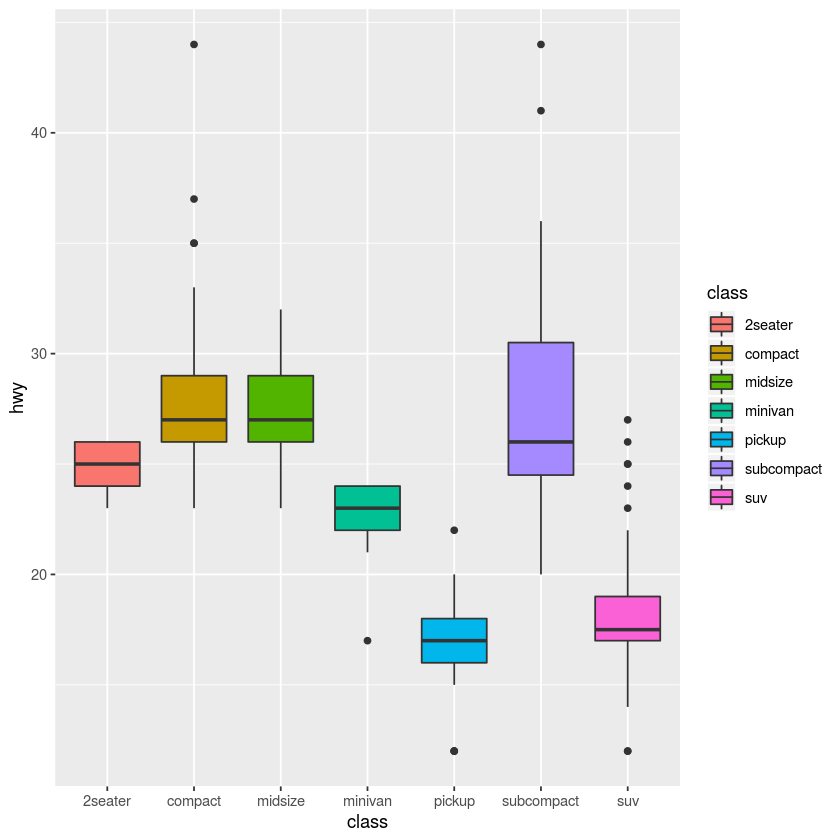

In [25]:
# Create a box plot of
# mpg class and hwy
# fill by class
# varwidth = TRUE
mpg %>% 
   ggplot(aes(class, hwy, fill = class)) + 
   geom_boxplot()


Setting varwidth = TRUE for a boxplot changes the width of each box in proportion to the number of rows of that class. 2seater didn't have much variance in the data because there weren't that many 2seater vehicles in the data set. By contrast, there are a large number of suvs yet most have a hwy value in a similar range.

## Code Recap

mpg$class,n
<chr>,<int>
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


class,n
<chr>,<int>
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


mpg$class,n
<chr>,<int>
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


Warning message:
“Unknown levels in `f`: min, avg, max”

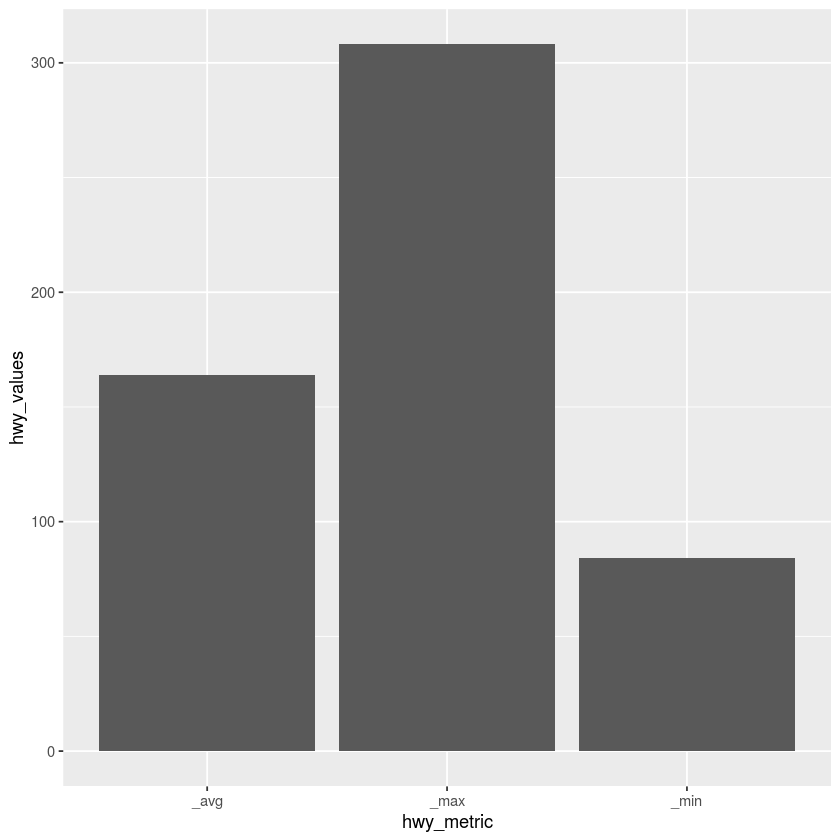

Warning message:
“Ignoring unknown parameters: varwidth”

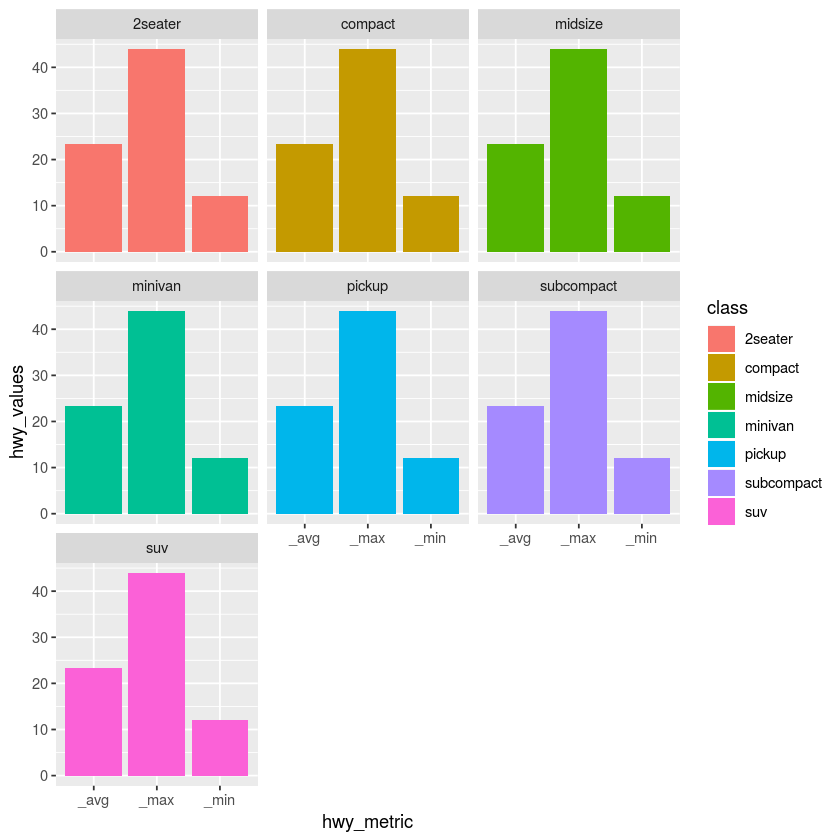

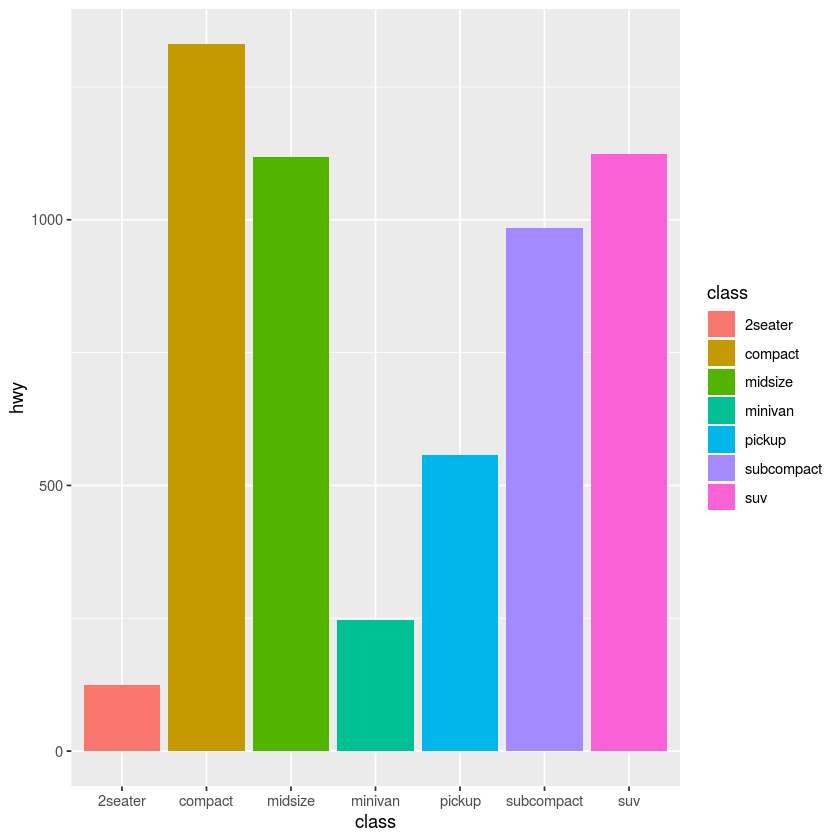

In [40]:
# Load libraries
library(forcats)    # forcats
library(stringr)    # stringr
library(tidyverse)  # tidyverse

# Display the distinct values of mpg$class and row count
# Sort by largest class first
# Use group_by(), summarize(), n(), arrange()
mpg %>% 
   group_by(mpg$class) %>% 
   summarize(n = n()) %>%
   arrange(n %>% desc())

# Display the distinct values of mpg$class and row count
# Use group_by(), tally()
# Sort results, largest first
mpg %>% group_by(class) %>% 
   tally(sort = TRUE)

# Display the distinct values of mpg$class and row count
# Use count()
# Sort results, largest first
mpg %>% count(mpg$class, sort = TRUE)

# Transform mpg into 
# Columns: class, hwy_max, hwy_avg, hwy_min
# where max, avg, and min are summaries of hwy 
# grouped by class
# source: mpg
# result: df
df <- mpg %>% group_by(class) %>% 
   summarize(hwy_max = max(mpg$hwy),
            hwy_avg = mean(mpg$hwy),
            hwy_min = min(mpg$hwy))

# Gather hwy_min, hwy_max, hwy_avg into 
# hwy_metric and hwy_value columns
# source: df
# result: df2
# Hint: gather()
df2 <- df %>% 
   gather(2:4, key = hwy_metric, value = hwy_values)

# Remove the hwy_ prefix from hwy_metric column
# Store result in df3
# Hint: str_replace()
df3 <- df2 %>% 
   mutate(hwy_metric = hwy_metric %>% str_replace("hwy", ""))

# Plot min, max, and avg
# using geom_col()
df3 %>% 
   ggplot(aes(hwy_metric, hwy_values)) + 
      geom_col()

# Convert hwy_metric to a factor
# Store result in df4
# Hint: as.factor()
df4 <- df3 %>% 
   mutate(hwy_metric = hwy_metric %>% as.factor())

# Reorder the levels
# min, avg, max
# update df4
# Hint: fct_relevel()
df4 <- df4 %>% 
   mutate(hwy_metric = hwy_metric %>% fct_relevel(c("min", "avg", "max")))

# Plot min, max, and avg
# using geom_col()
# fill by class
# position = "dodge"
# facet by class
df4 %>% 
   ggplot(aes(x = hwy_metric , y = hwy_values, fill = class)) + 
      geom_col(position = "dodge") +
      facet_wrap( ~class)

# Create a box plot of
# mpg class and hwy
# fill by class
# varwidth = TRUE
mpg %>% 
   ggplot(aes(x = class,y = hwy, fill = class)) + 
   geom_col(varwidth = TRUE)


# Summary
The dplyr package contains a number of functions to help manipulate and group data. You used the generic group_by() then summarize() functions counting rows with n() as well as calculating summary statistics of min, mean, and max. You found that there were many convenience functions in dplyr. You used tally() and count(). You plotted the summarized results after using gather to move the stats columns to rows. Finally, you discovered that common stat functions are built into various ggplot geoms and explored the box plot. There will be many occasions to group data. You now have the tools to perform this task with ease. 